In [215]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [216]:
data = pd.read_csv('Data/adult.data', index_col=False, names=["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"])
data.head(5)

age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week  native-country  income  
0          2174             0              40   United-States   <=50K  
1             0             0              13   United-States   <=50K  
2             0             0              40   United-States   <=50K  
3             0             0              40   United-States   <=50K  
4             0             0              40            Cuba   <=50K

In [217]:
data.describe()

age        fnlwgt  education-num  capital-gain  capital-loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

In [218]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [219]:
# data.drop(["capital-loss", "fnlwgt"], axis=1, inplace=True)

In [220]:
data[data.select_dtypes('object').columns] = data.select_dtypes('object').apply(lambda x: x.str.strip())
data.replace(r'^\?$', np.NaN, regex=True, inplace=True)

In [221]:
null_cols = [col for col in data.columns if any(data[col].isna())]
if null_cols:
    fillers = data[null_cols].mode().iloc[0].to_dict()
    data.fillna(fillers, inplace=True)
    print(f'Found {len(null_cols)} columns with null values.' + 
    f' Filling them with their respective modes:\n{fillers}')

Found 3 columns with null values. Filling them with their respective modes:
{'workclass': 'Private', 'occupation': 'Prof-specialty', 'native-country': 'United-States'}


In [222]:
data['agegroup'] = data['age'].apply(lambda x: f'{(x//10)*10}-{(x//10)*10 + 9}')
data[['age', 'agegroup']]

age agegroup
0       39    30-39
1       50    50-59
2       38    30-39
3       53    50-59
4       28    20-29
...    ...      ...
32556   27    20-29
32557   40    40-49
32558   58    50-59
32559   22    20-29
32560   52    50-59

[32561 rows x 2 columns]

Text(0.5, 0, '\ncount')

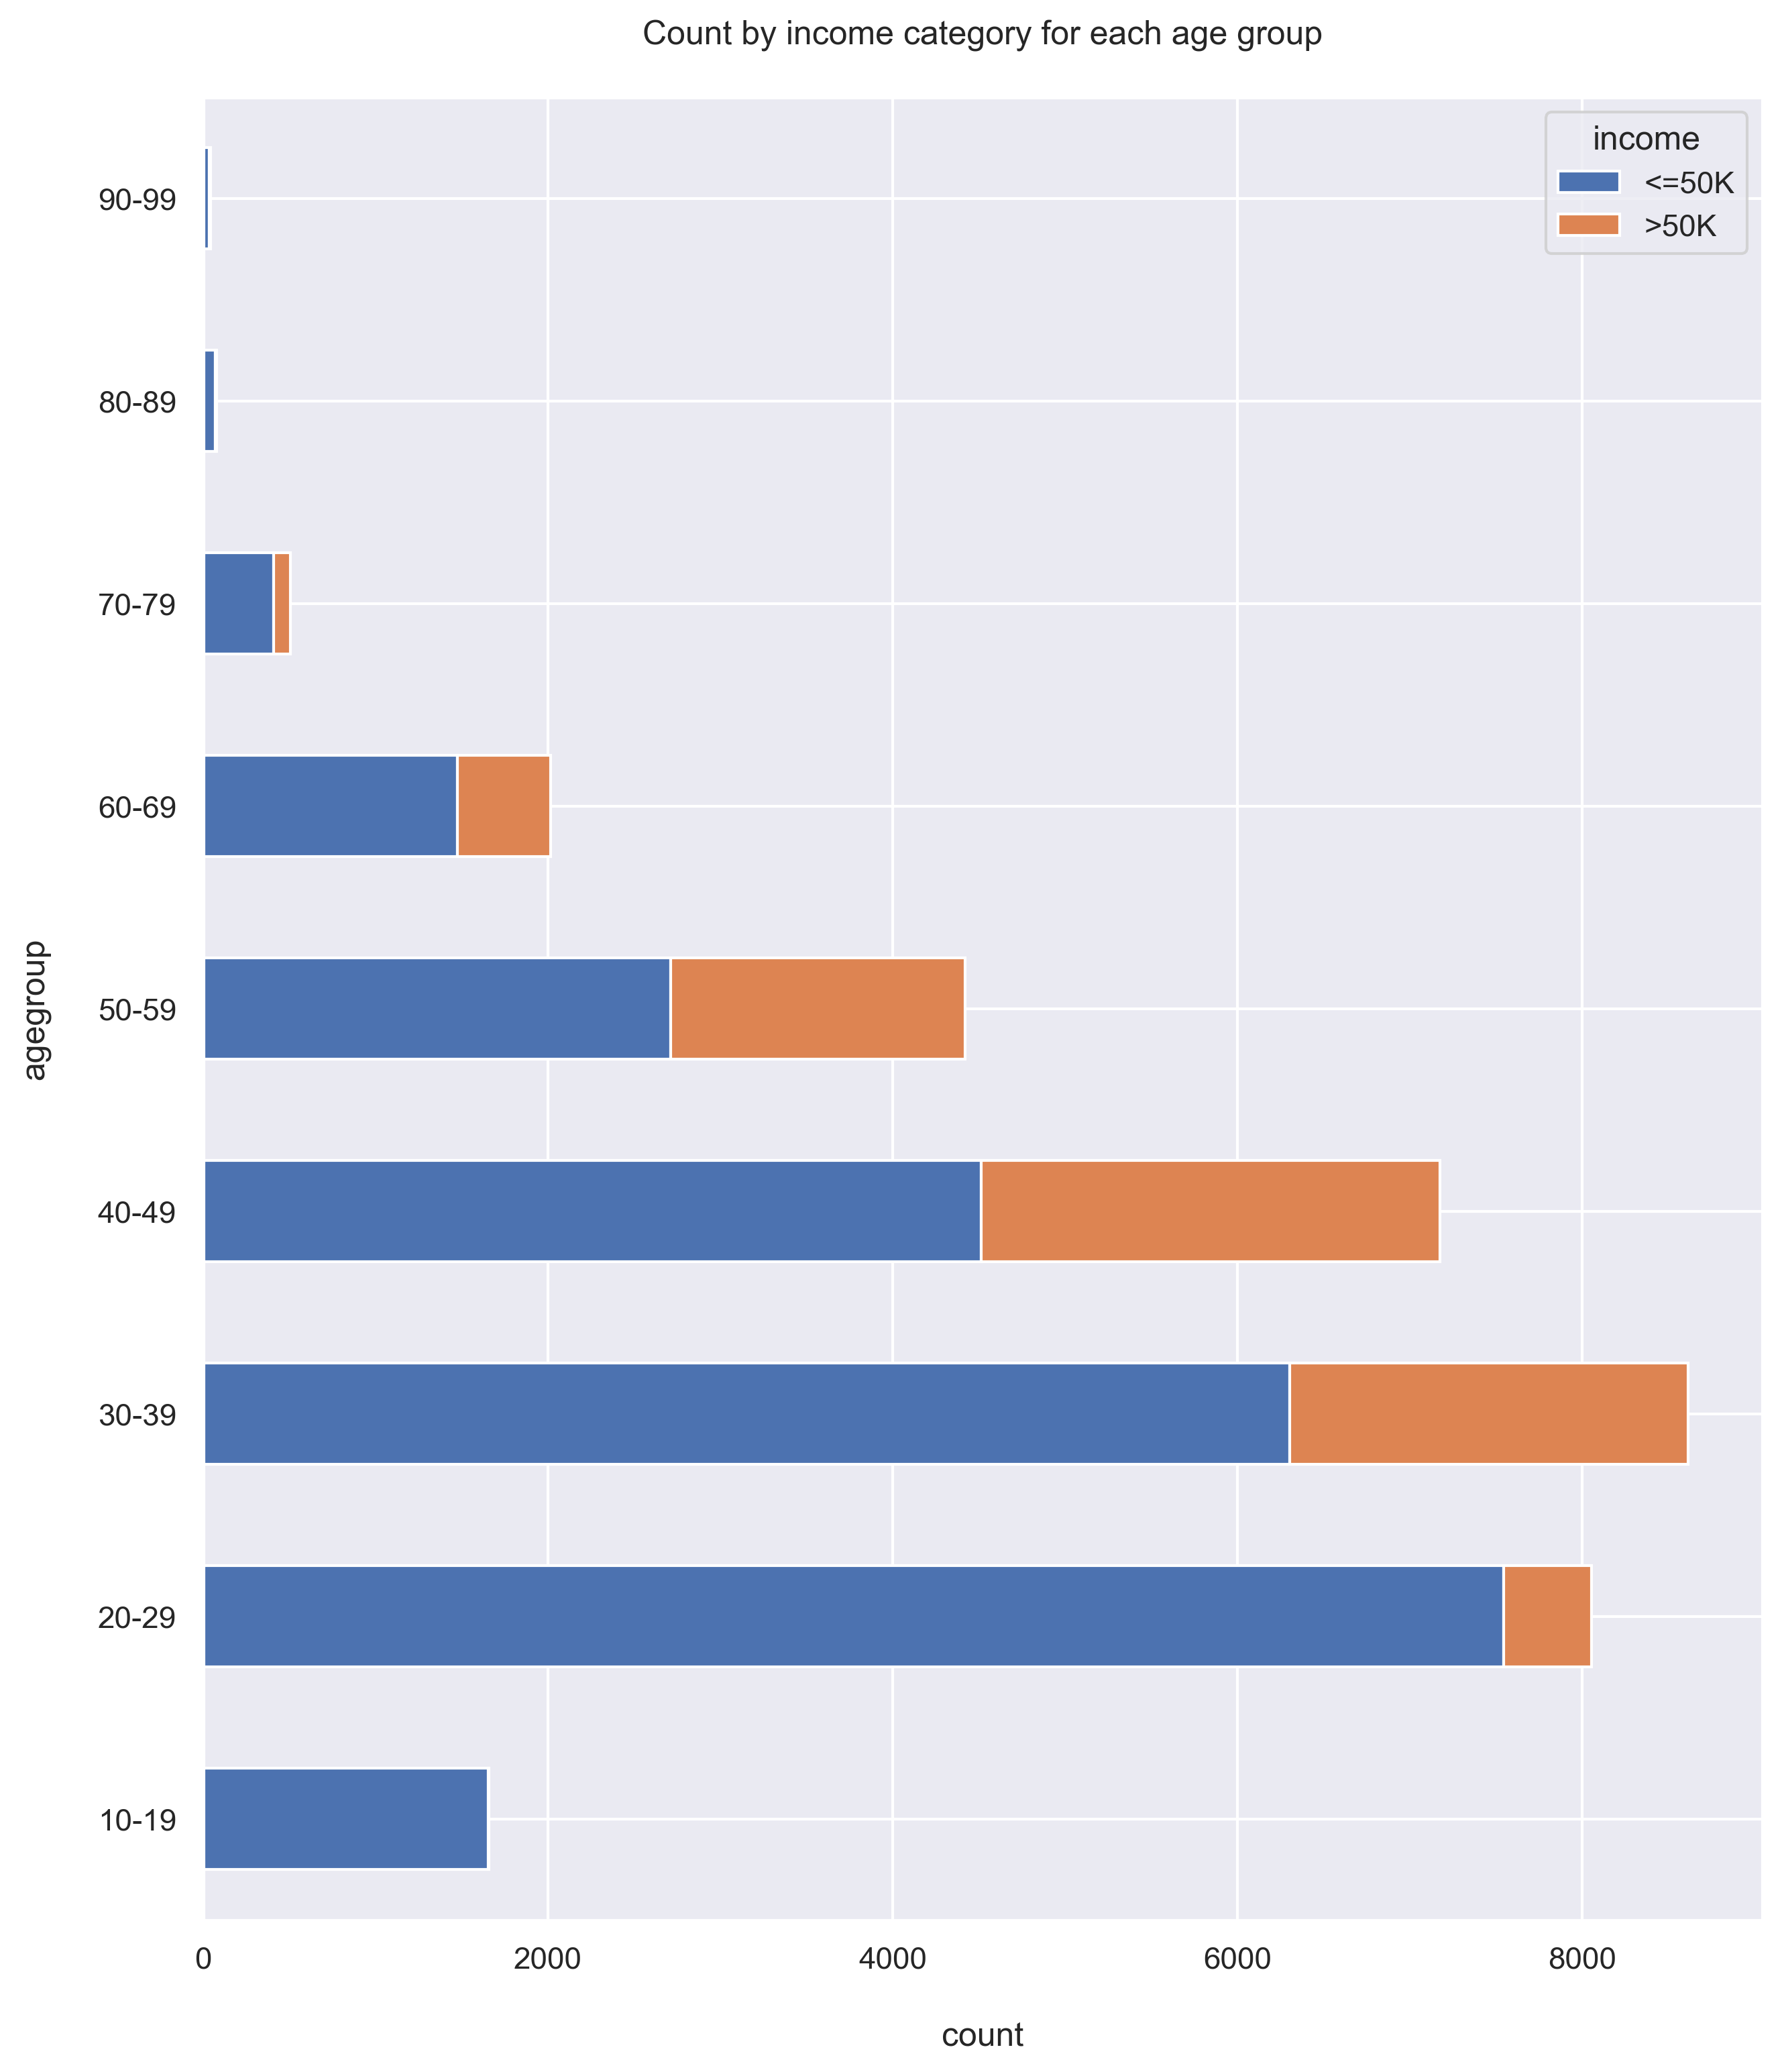

In [248]:
sns.set(style="darkgrid")
plt.rcParams['figure.dpi'] = 300
fig, ax = plt.subplots(figsize=(10, 12))
data[["agegroup", "income"]].groupby(['agegroup', 'income']).size().reset_index().pivot('agegroup', 'income')[0].plot(kind='barh', stacked=True, ax=ax)
ax.set_title('Count by income category for each age group\n')
ax.set_ylabel('agegroup\n')
ax.set_xlabel('\ncount')

Text(0.5, 1.0, 'Correlation heatmap\n')

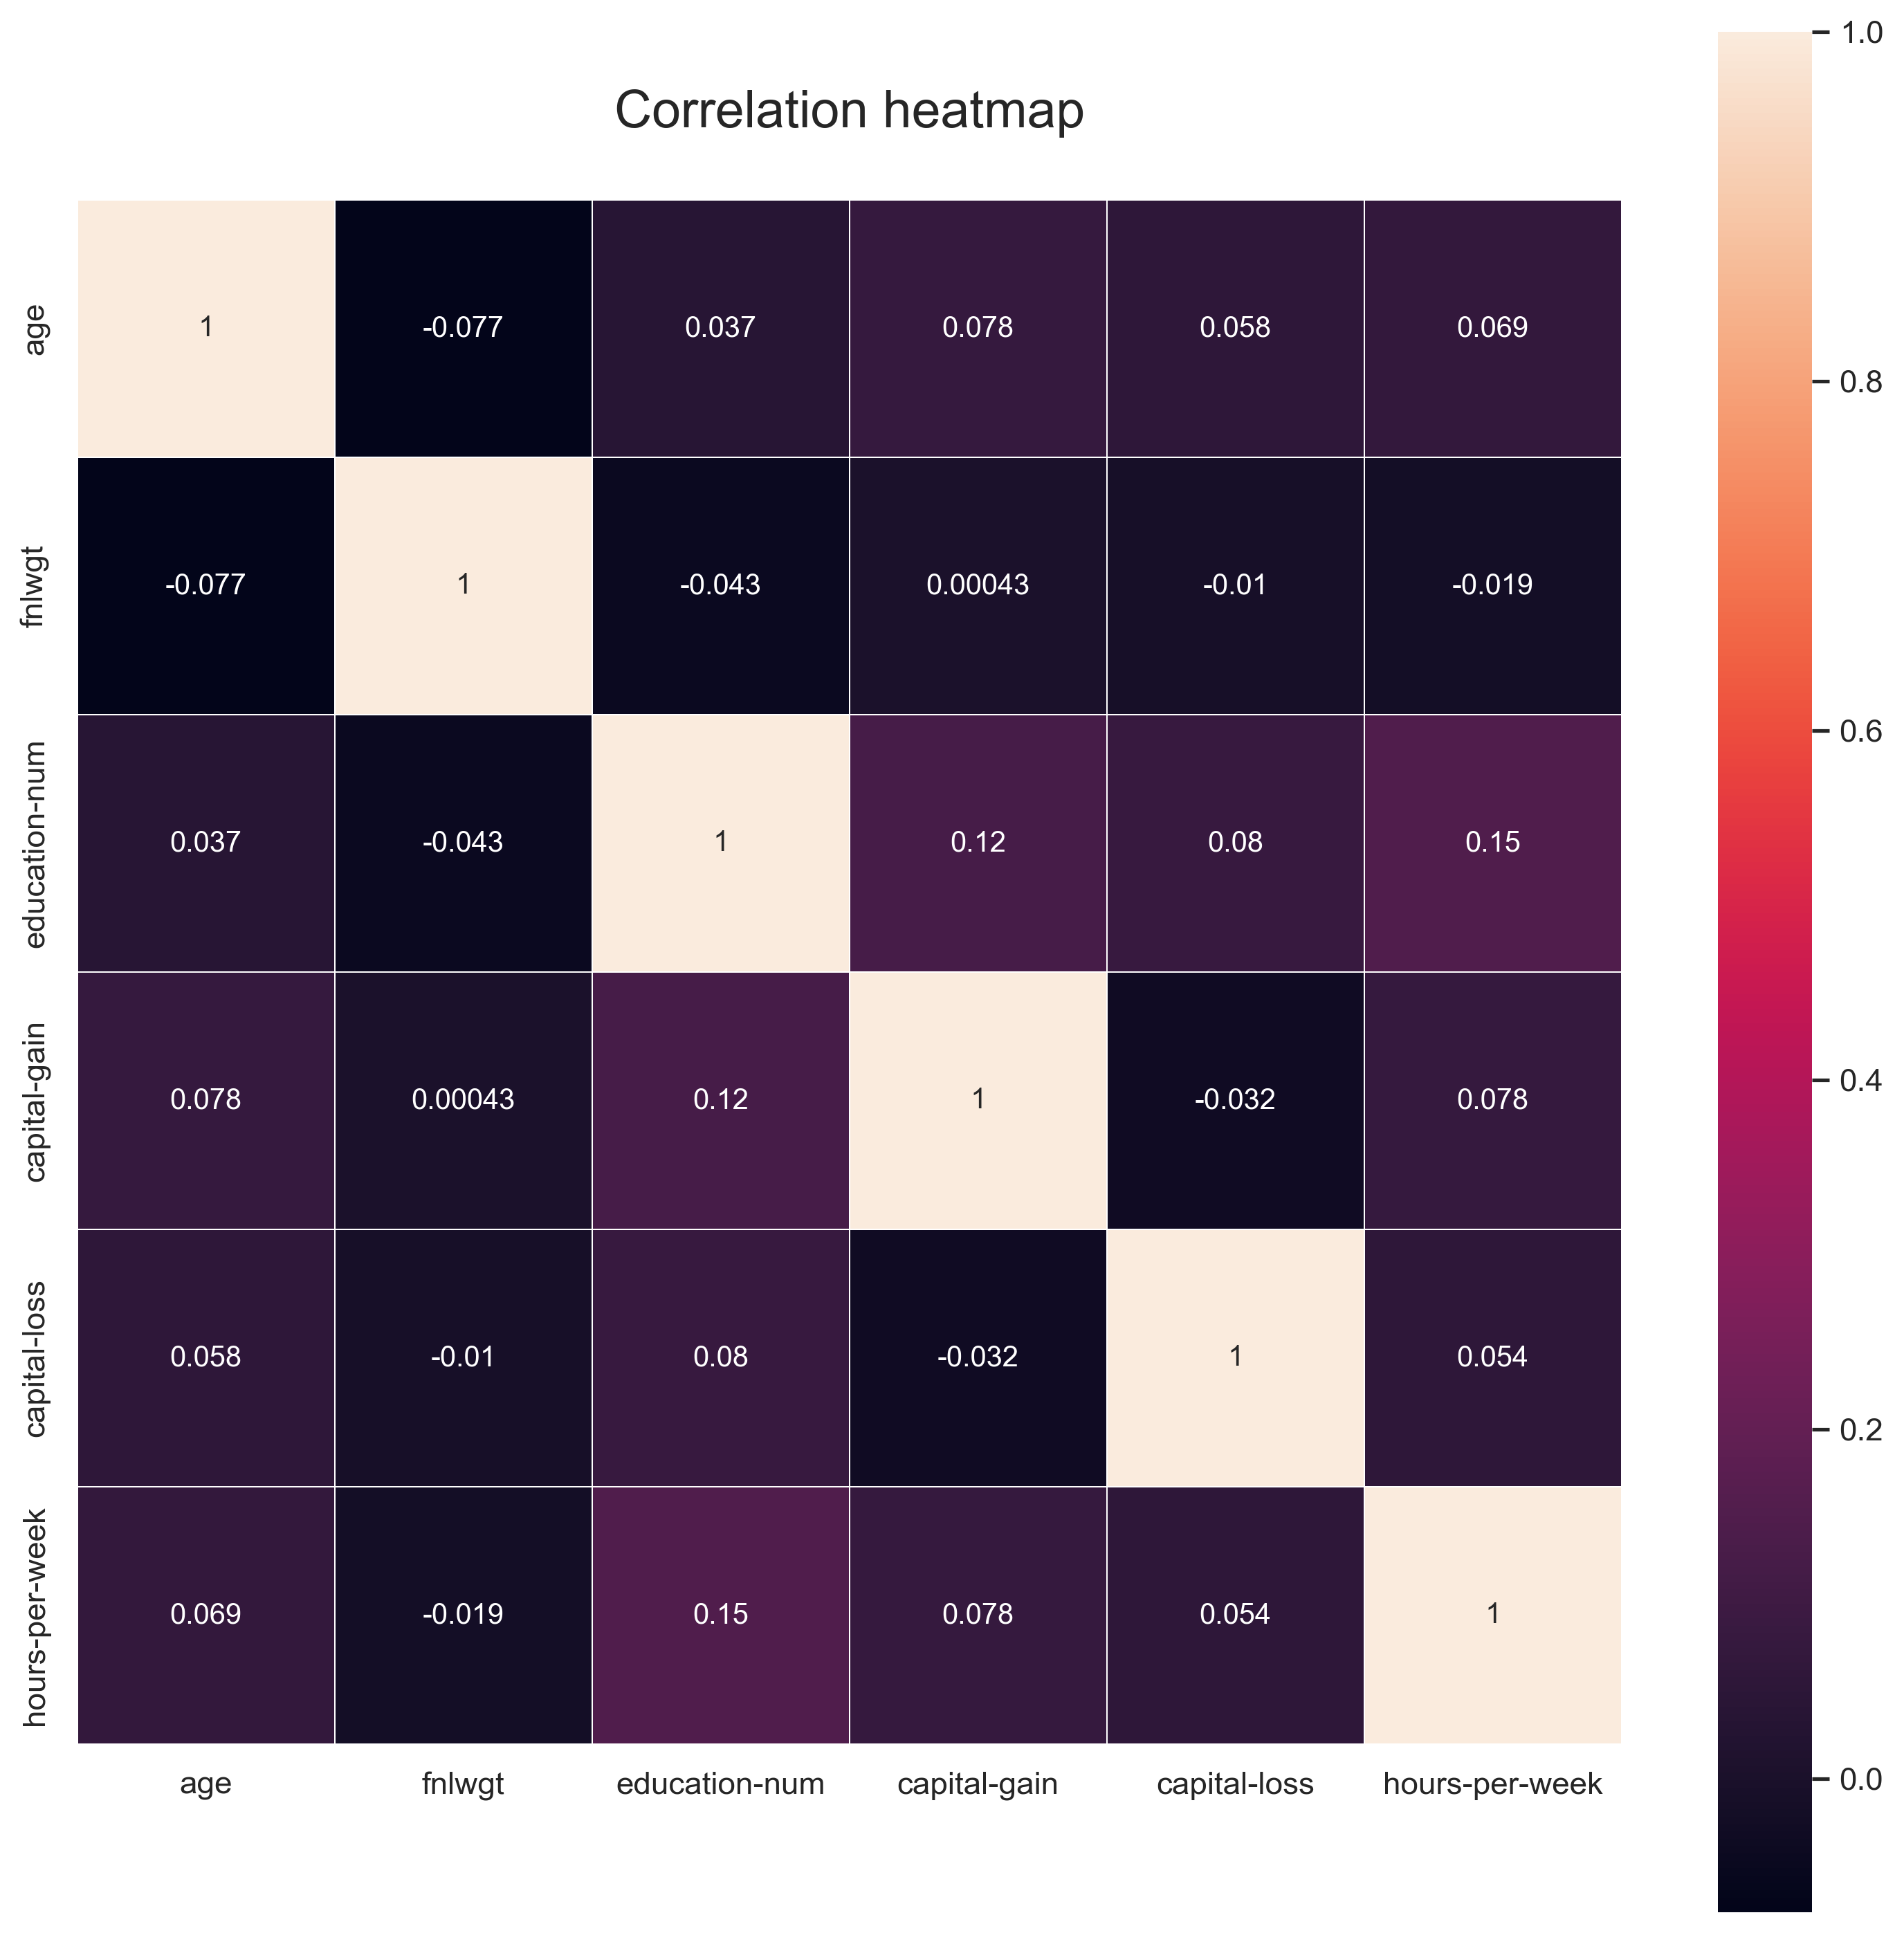

In [225]:
corr = data.select_dtypes('int64').corr()
fig, ax = plt.subplots(1, 1, figsize=(12,12))
sns.heatmap(corr, ax=ax, square=True, linewidth=0.1, annot=True, annot_kws={'size': 10})
plt.title('Correlation heatmap\n', fontdict={'size': 18})

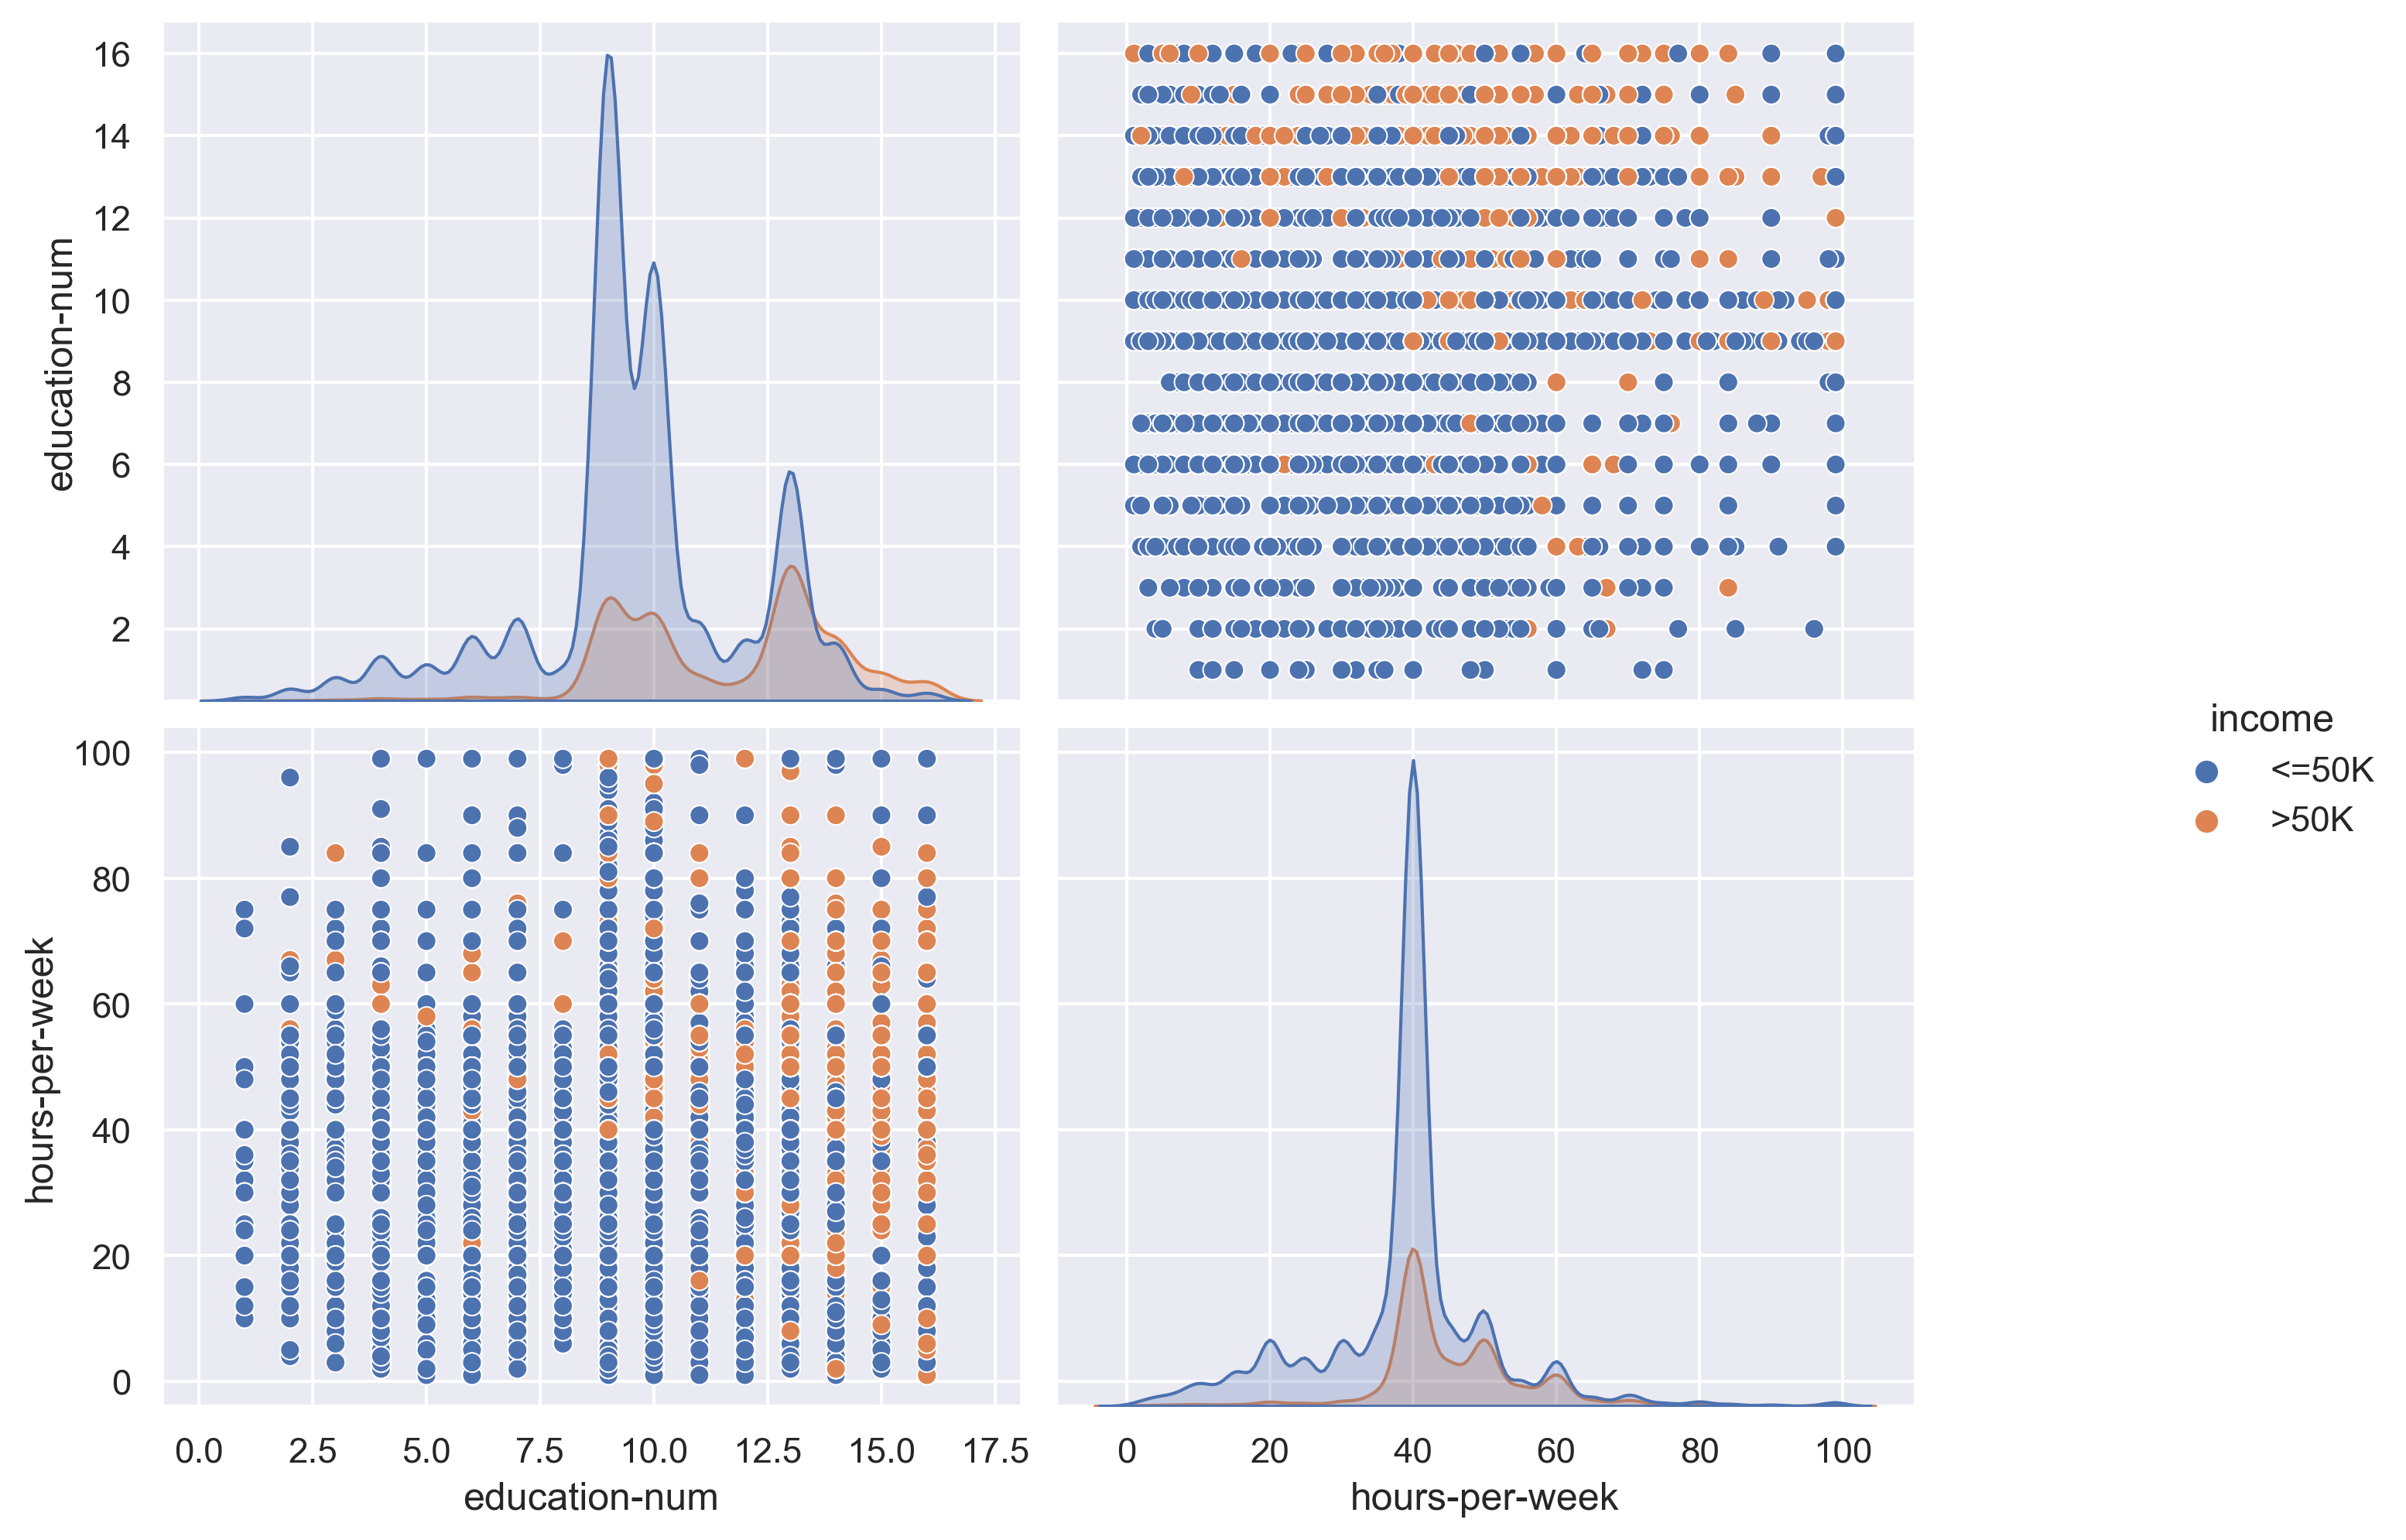

In [226]:
sns.pairplot(data[['income', 'education-num', 'hours-per-week']], hue='income')
fig = plt.gcf()
fig.set_figheight(7)
fig.set_figwidth(11)

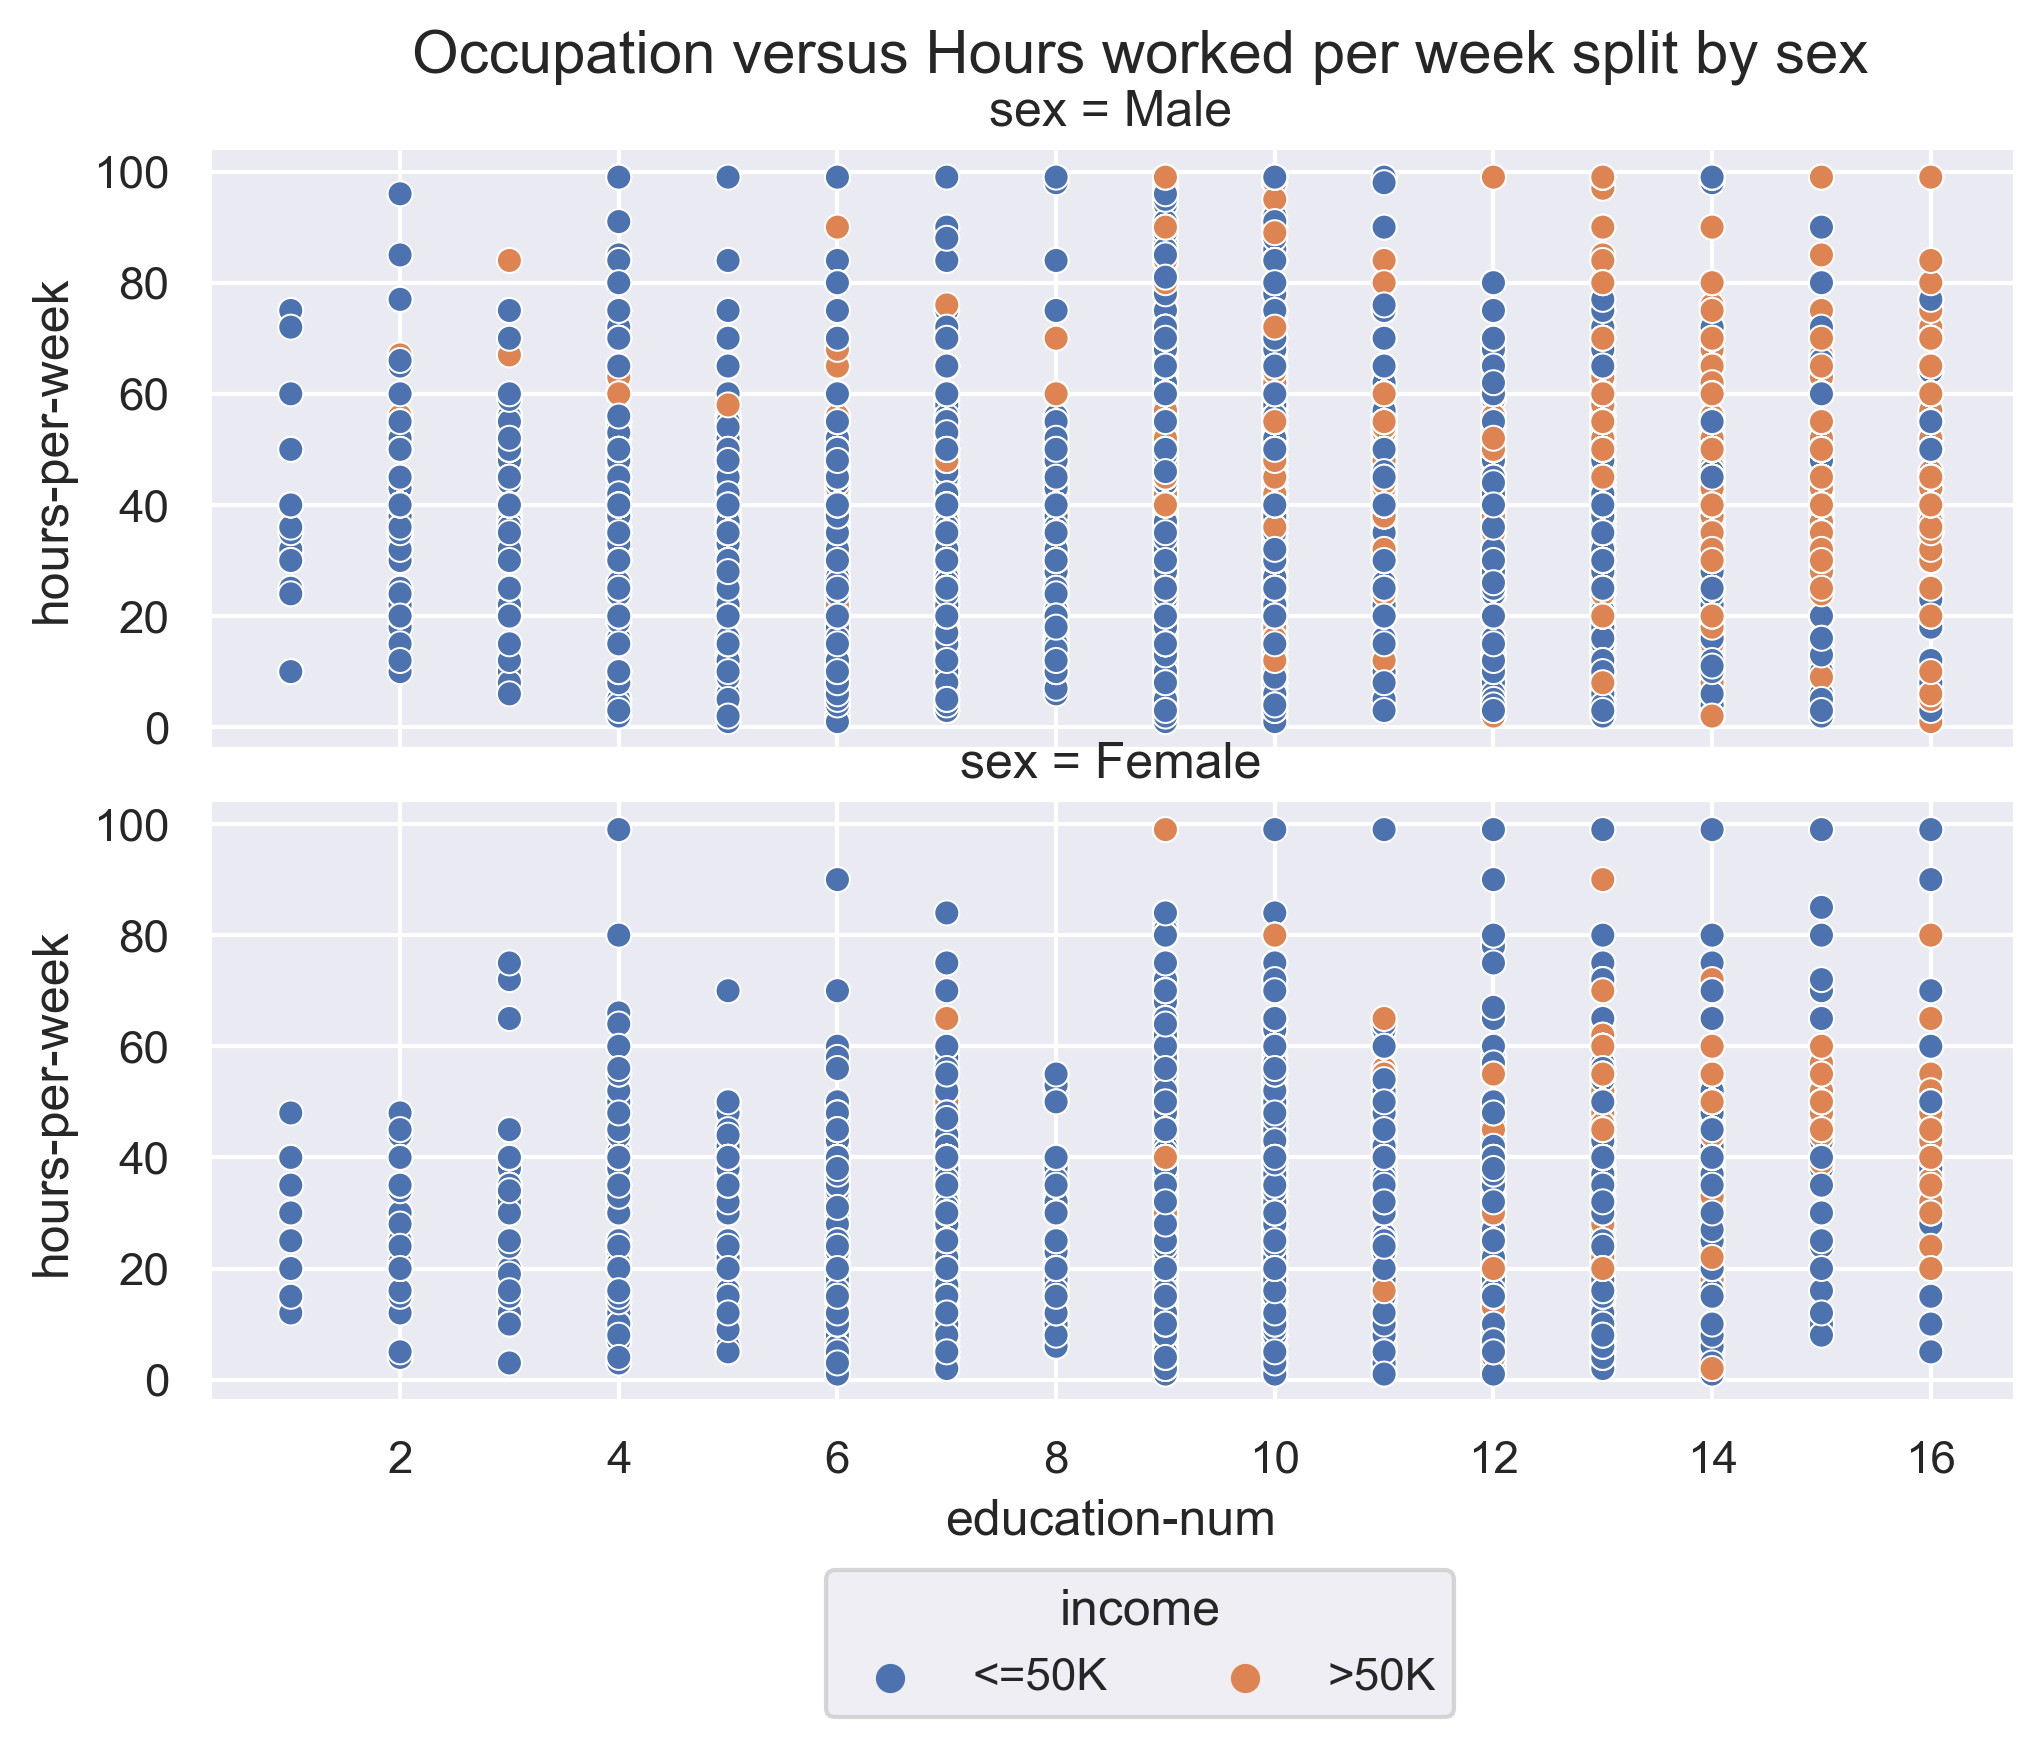

In [291]:
ax = sns.relplot(x='education-num', y='hours-per-week', data=data, kind='scatter', hue='income', col='sex', col_wrap=1)
ax.fig.subplots_adjust(top=0.9)
ax.fig.suptitle('Occupation versus Hours worked per week split by sex')
fig = plt.gcf()
fig.set_figheight(5)
fig.set_figwidth(9)
sns.move_legend(ax, "lower center", bbox_to_anchor=(.5, -.16), ncol=2, frameon=True)

Text(0.5, 1.0, 'Line chart showing the trends in capital-gain versus education \nfor the two income categories\n')

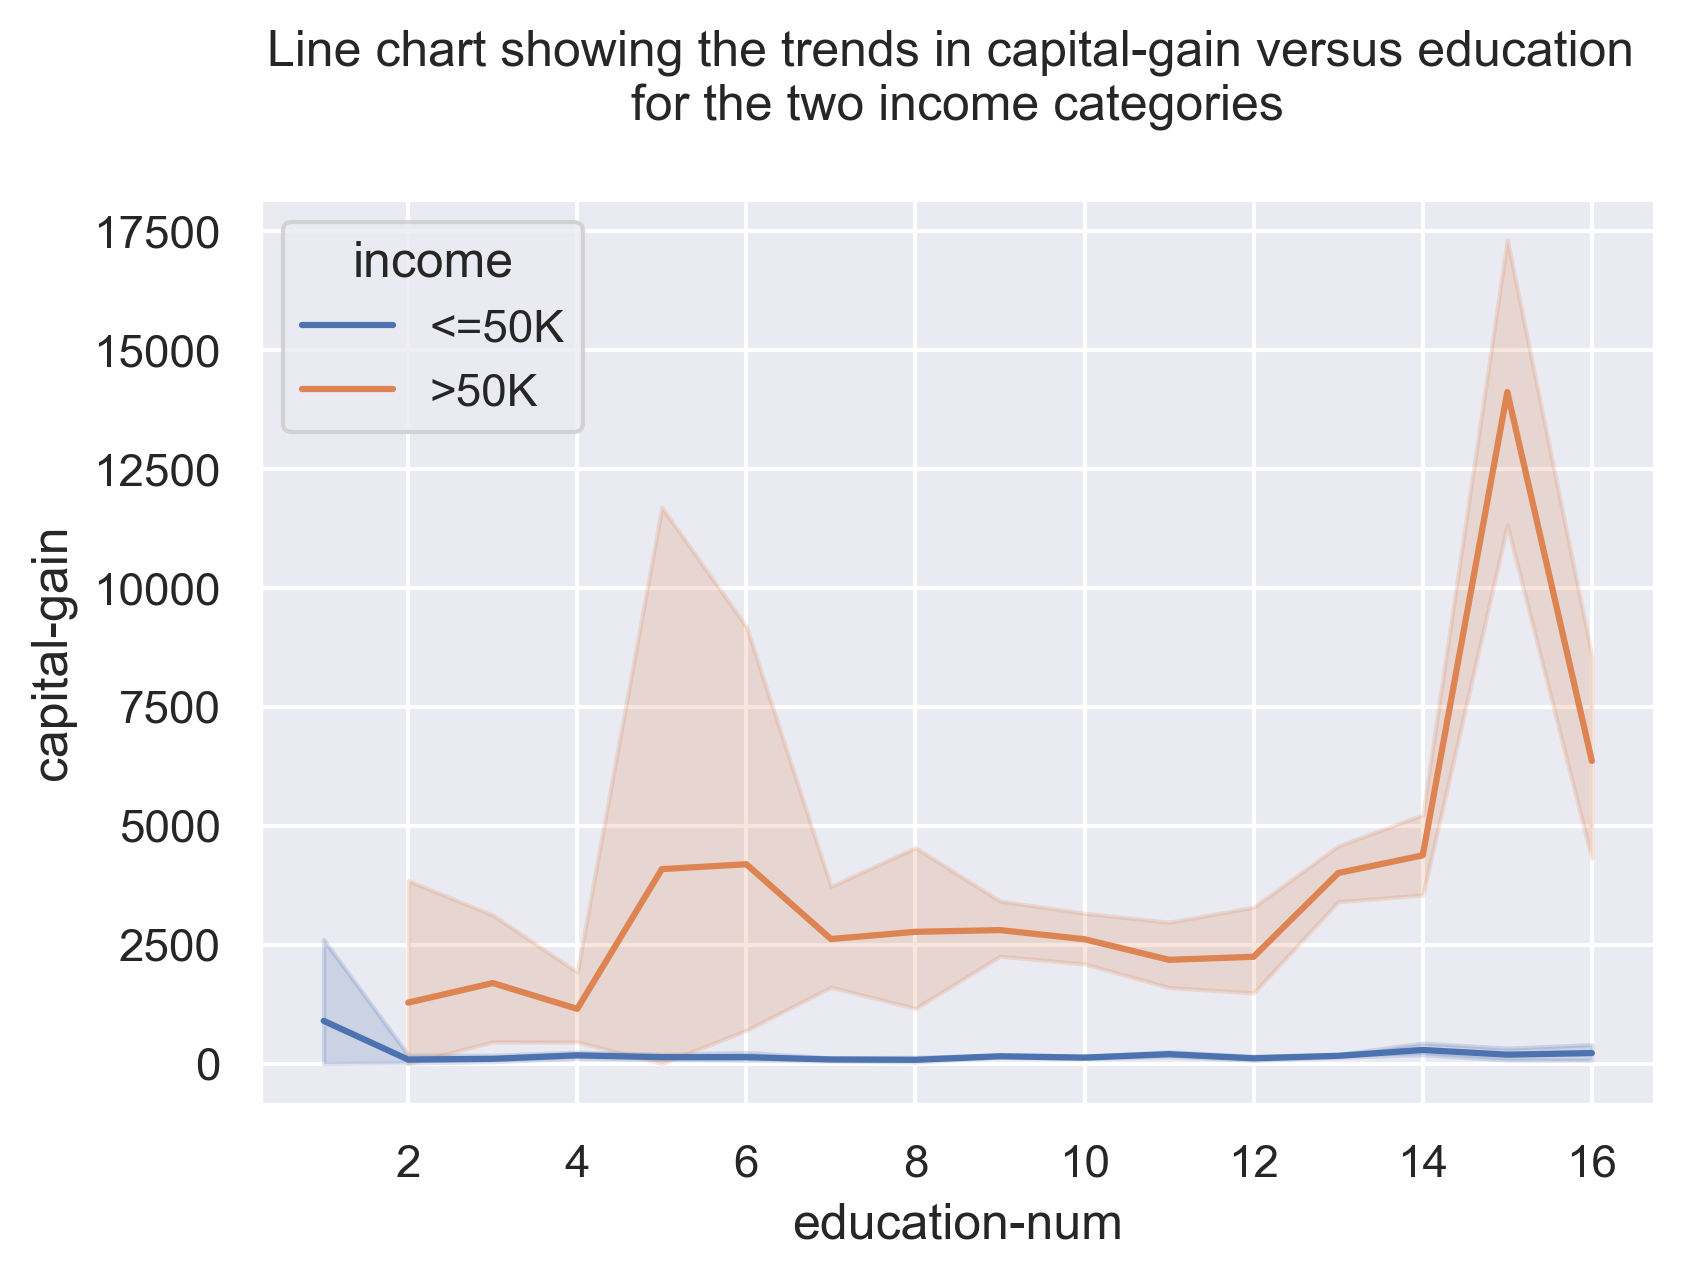

In [294]:
sns.lineplot(x="education-num", y="capital-gain", data=data, hue='income')
plt.title('Line chart showing the trends in capital-gain versus education \nfor the two income categories\n')

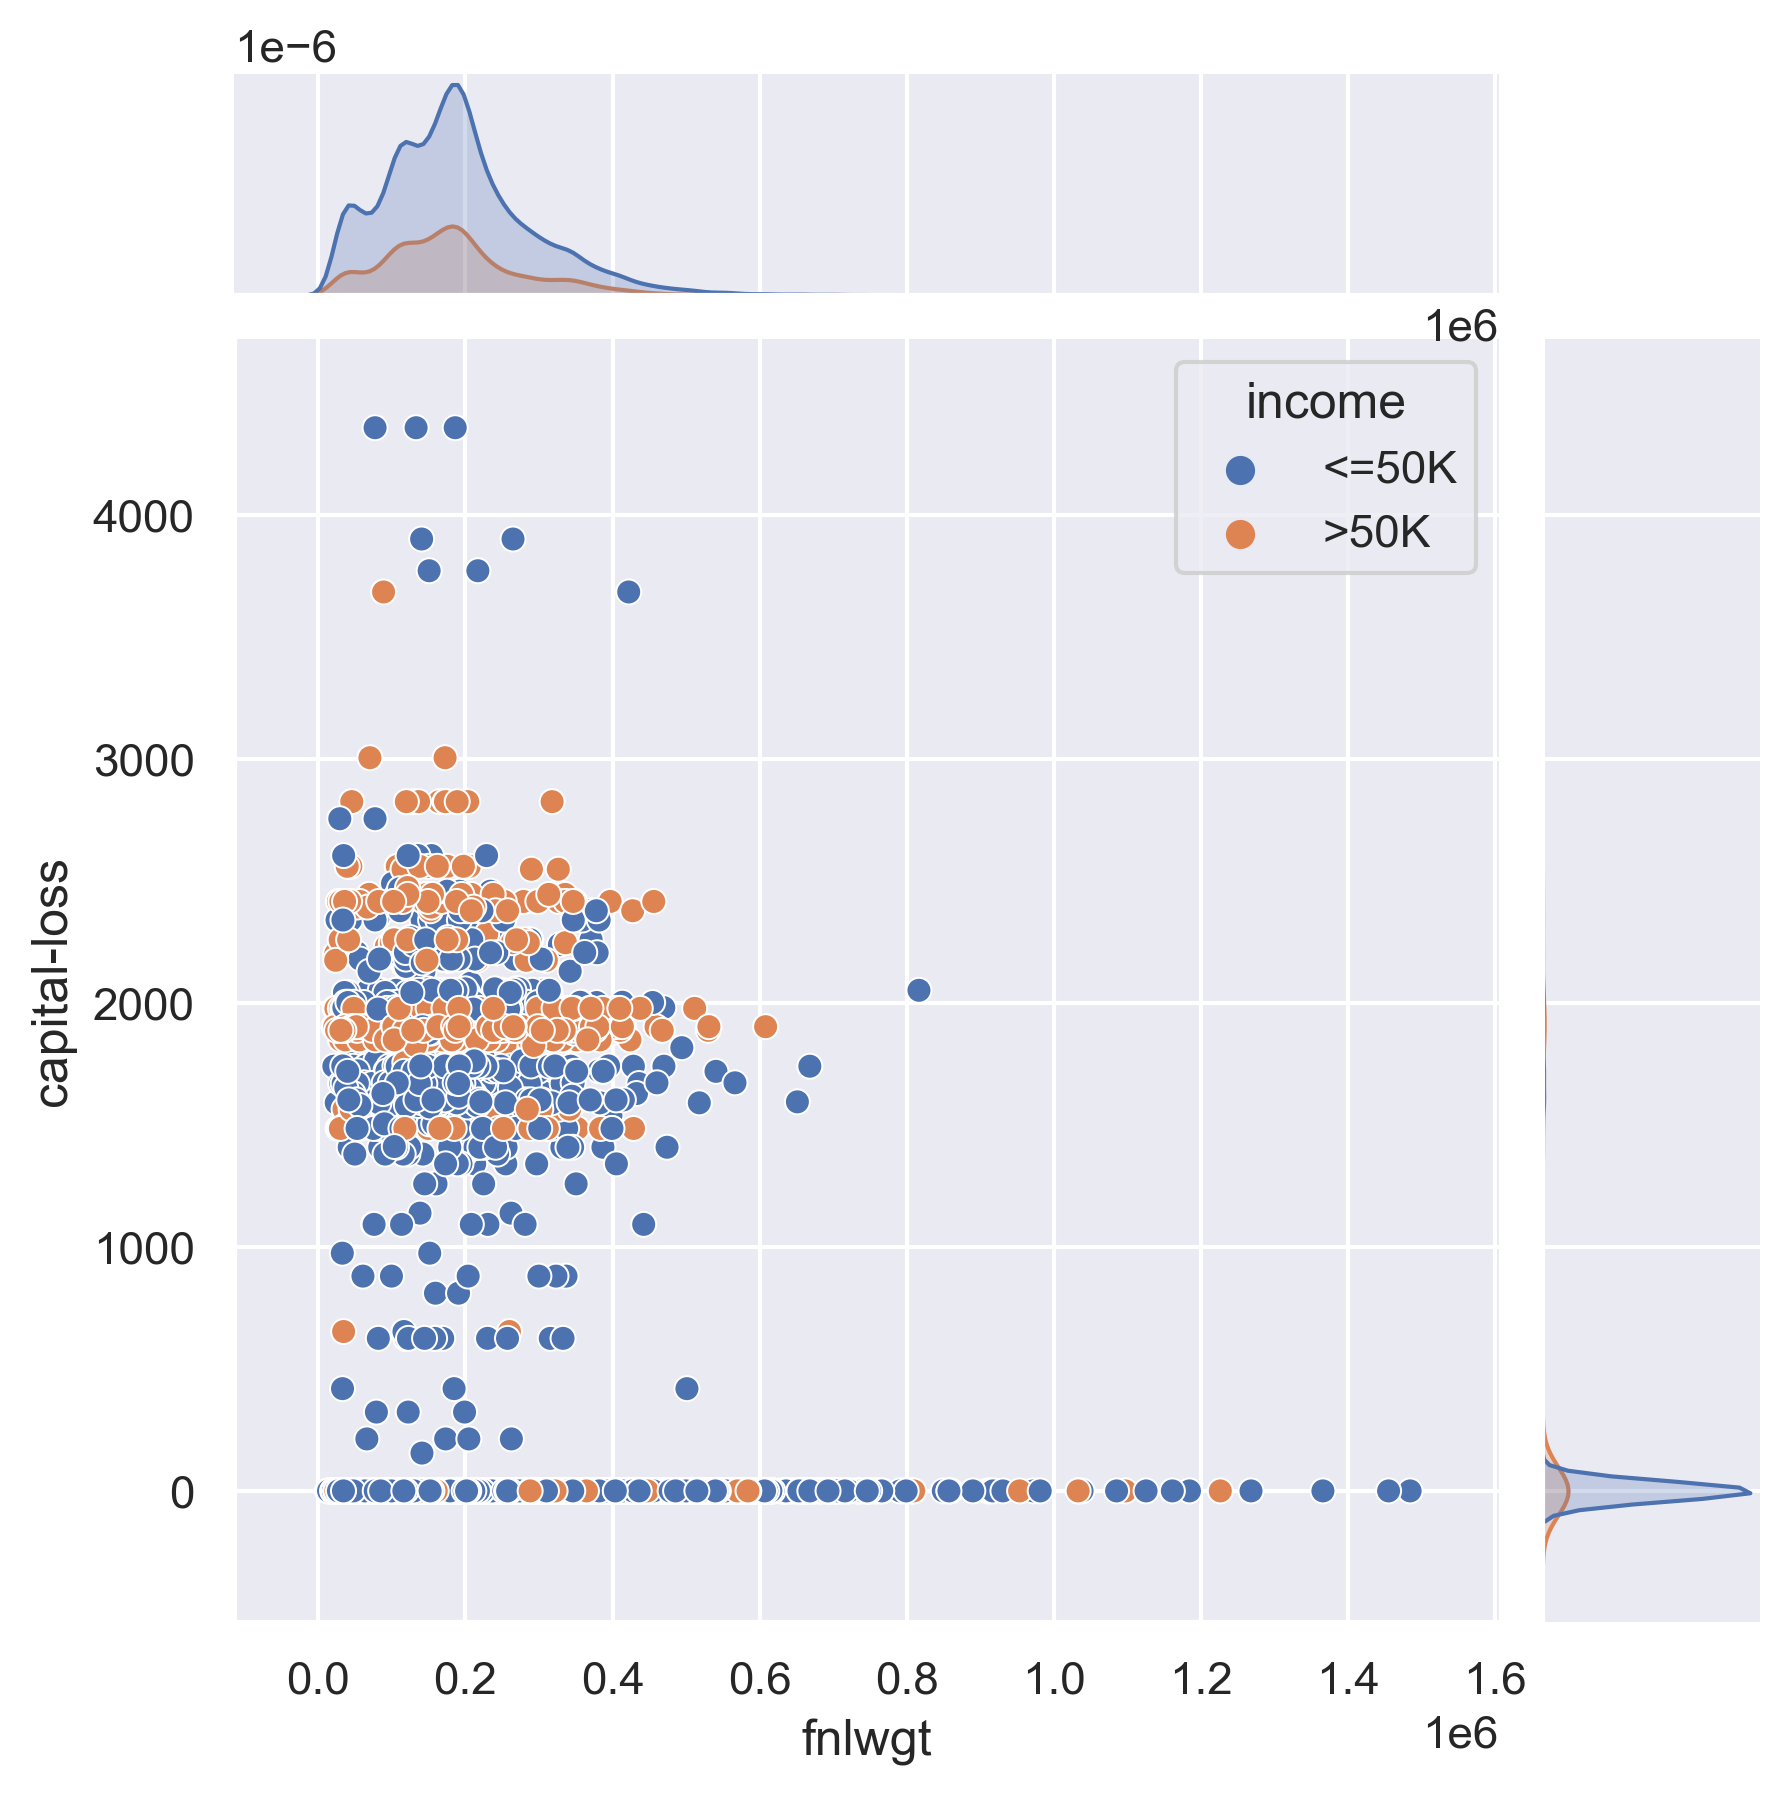

In [229]:
sns.jointplot(
    x='fnlwgt', 
    y='capital-loss', 
    data=data,  
    hue='income')

Text(0.5, 1.0, 'Box and Whisker plot of hours-per-week for different occupations\n\n')

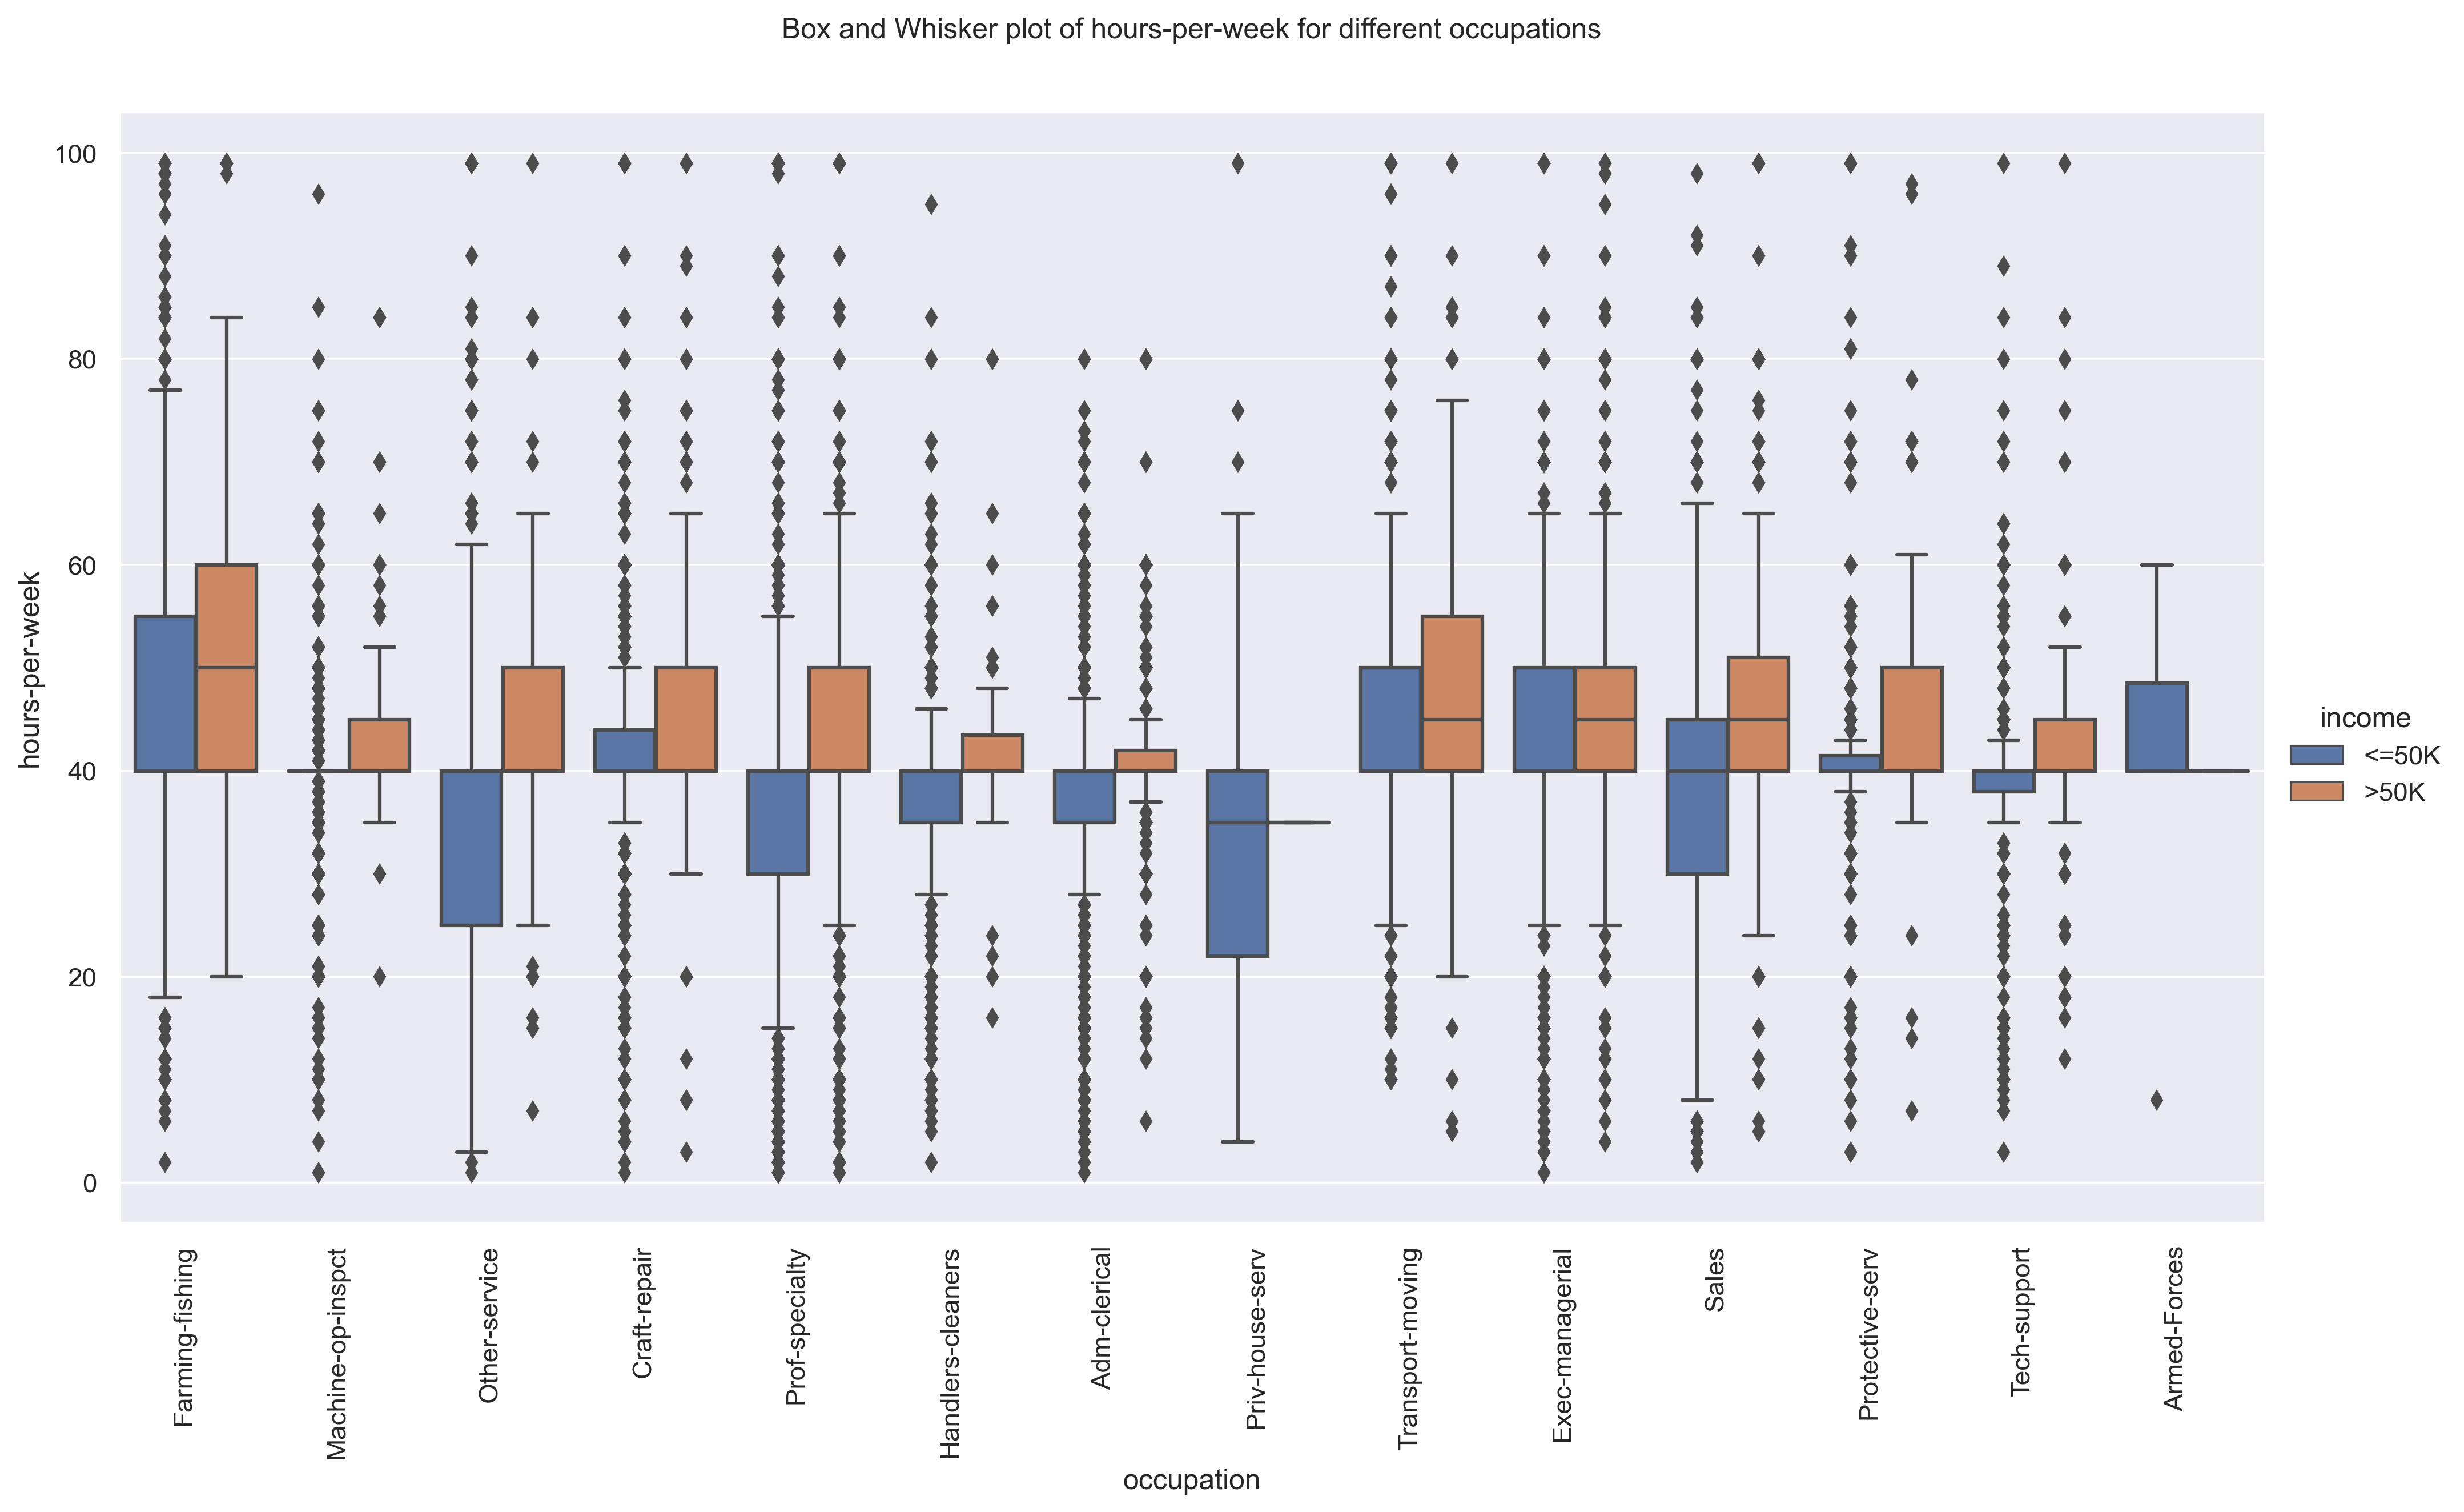

In [317]:
g = sns.catplot(y='hours-per-week', x='occupation', data=data.sort_values(by="education-num"), 
                height=3, kind='box', aspect=4.5, hue='income', orient='v')
fig = plt.gcf()
fig.set_figheight(9)
# fig.set_figwidth(15)
g.set_xticklabels(rotation=90, ha='right')
plt.title('Box and Whisker plot of hours-per-week for different occupations\n\n')

<AxesSubplot:xlabel='fnlwgt', ylabel='education-num'>

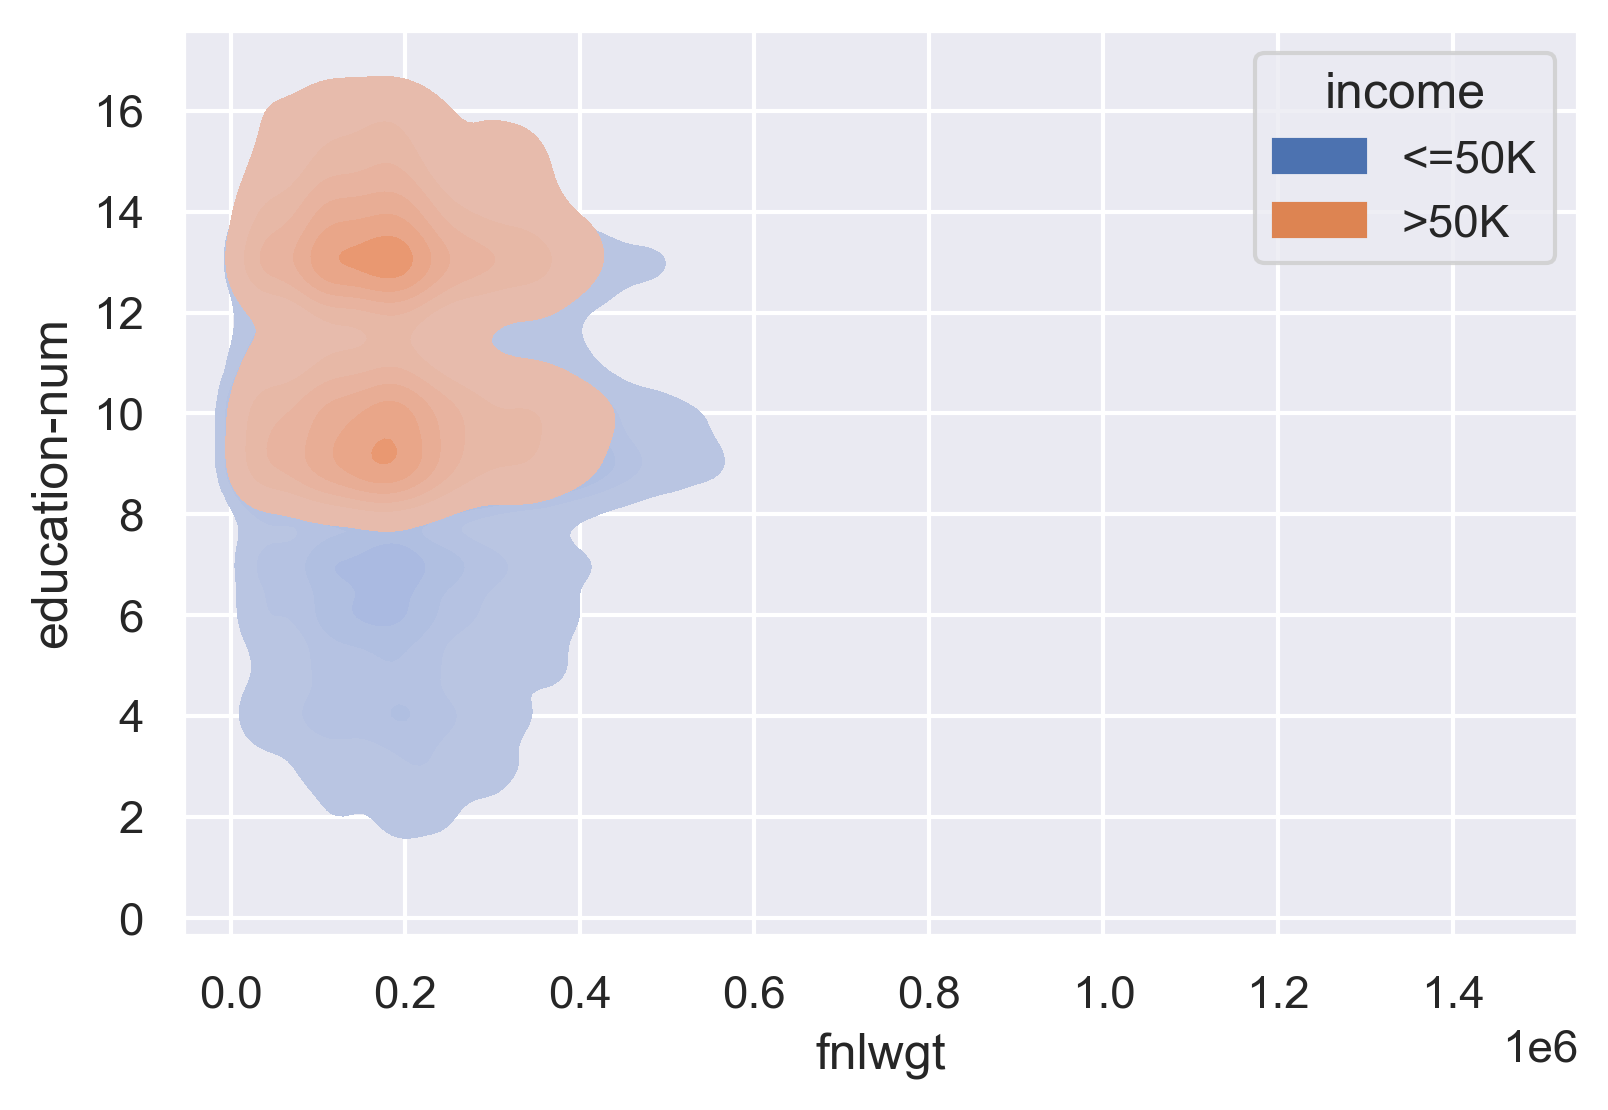

In [231]:
sns.kdeplot(
    x='fnlwgt', 
    y='education-num',
    data=data,  
    hue='income', fill=True)

Text(0.5, 0.98, 'Pie chart showing proportions of people in various marital statuses for each income category\n\n')

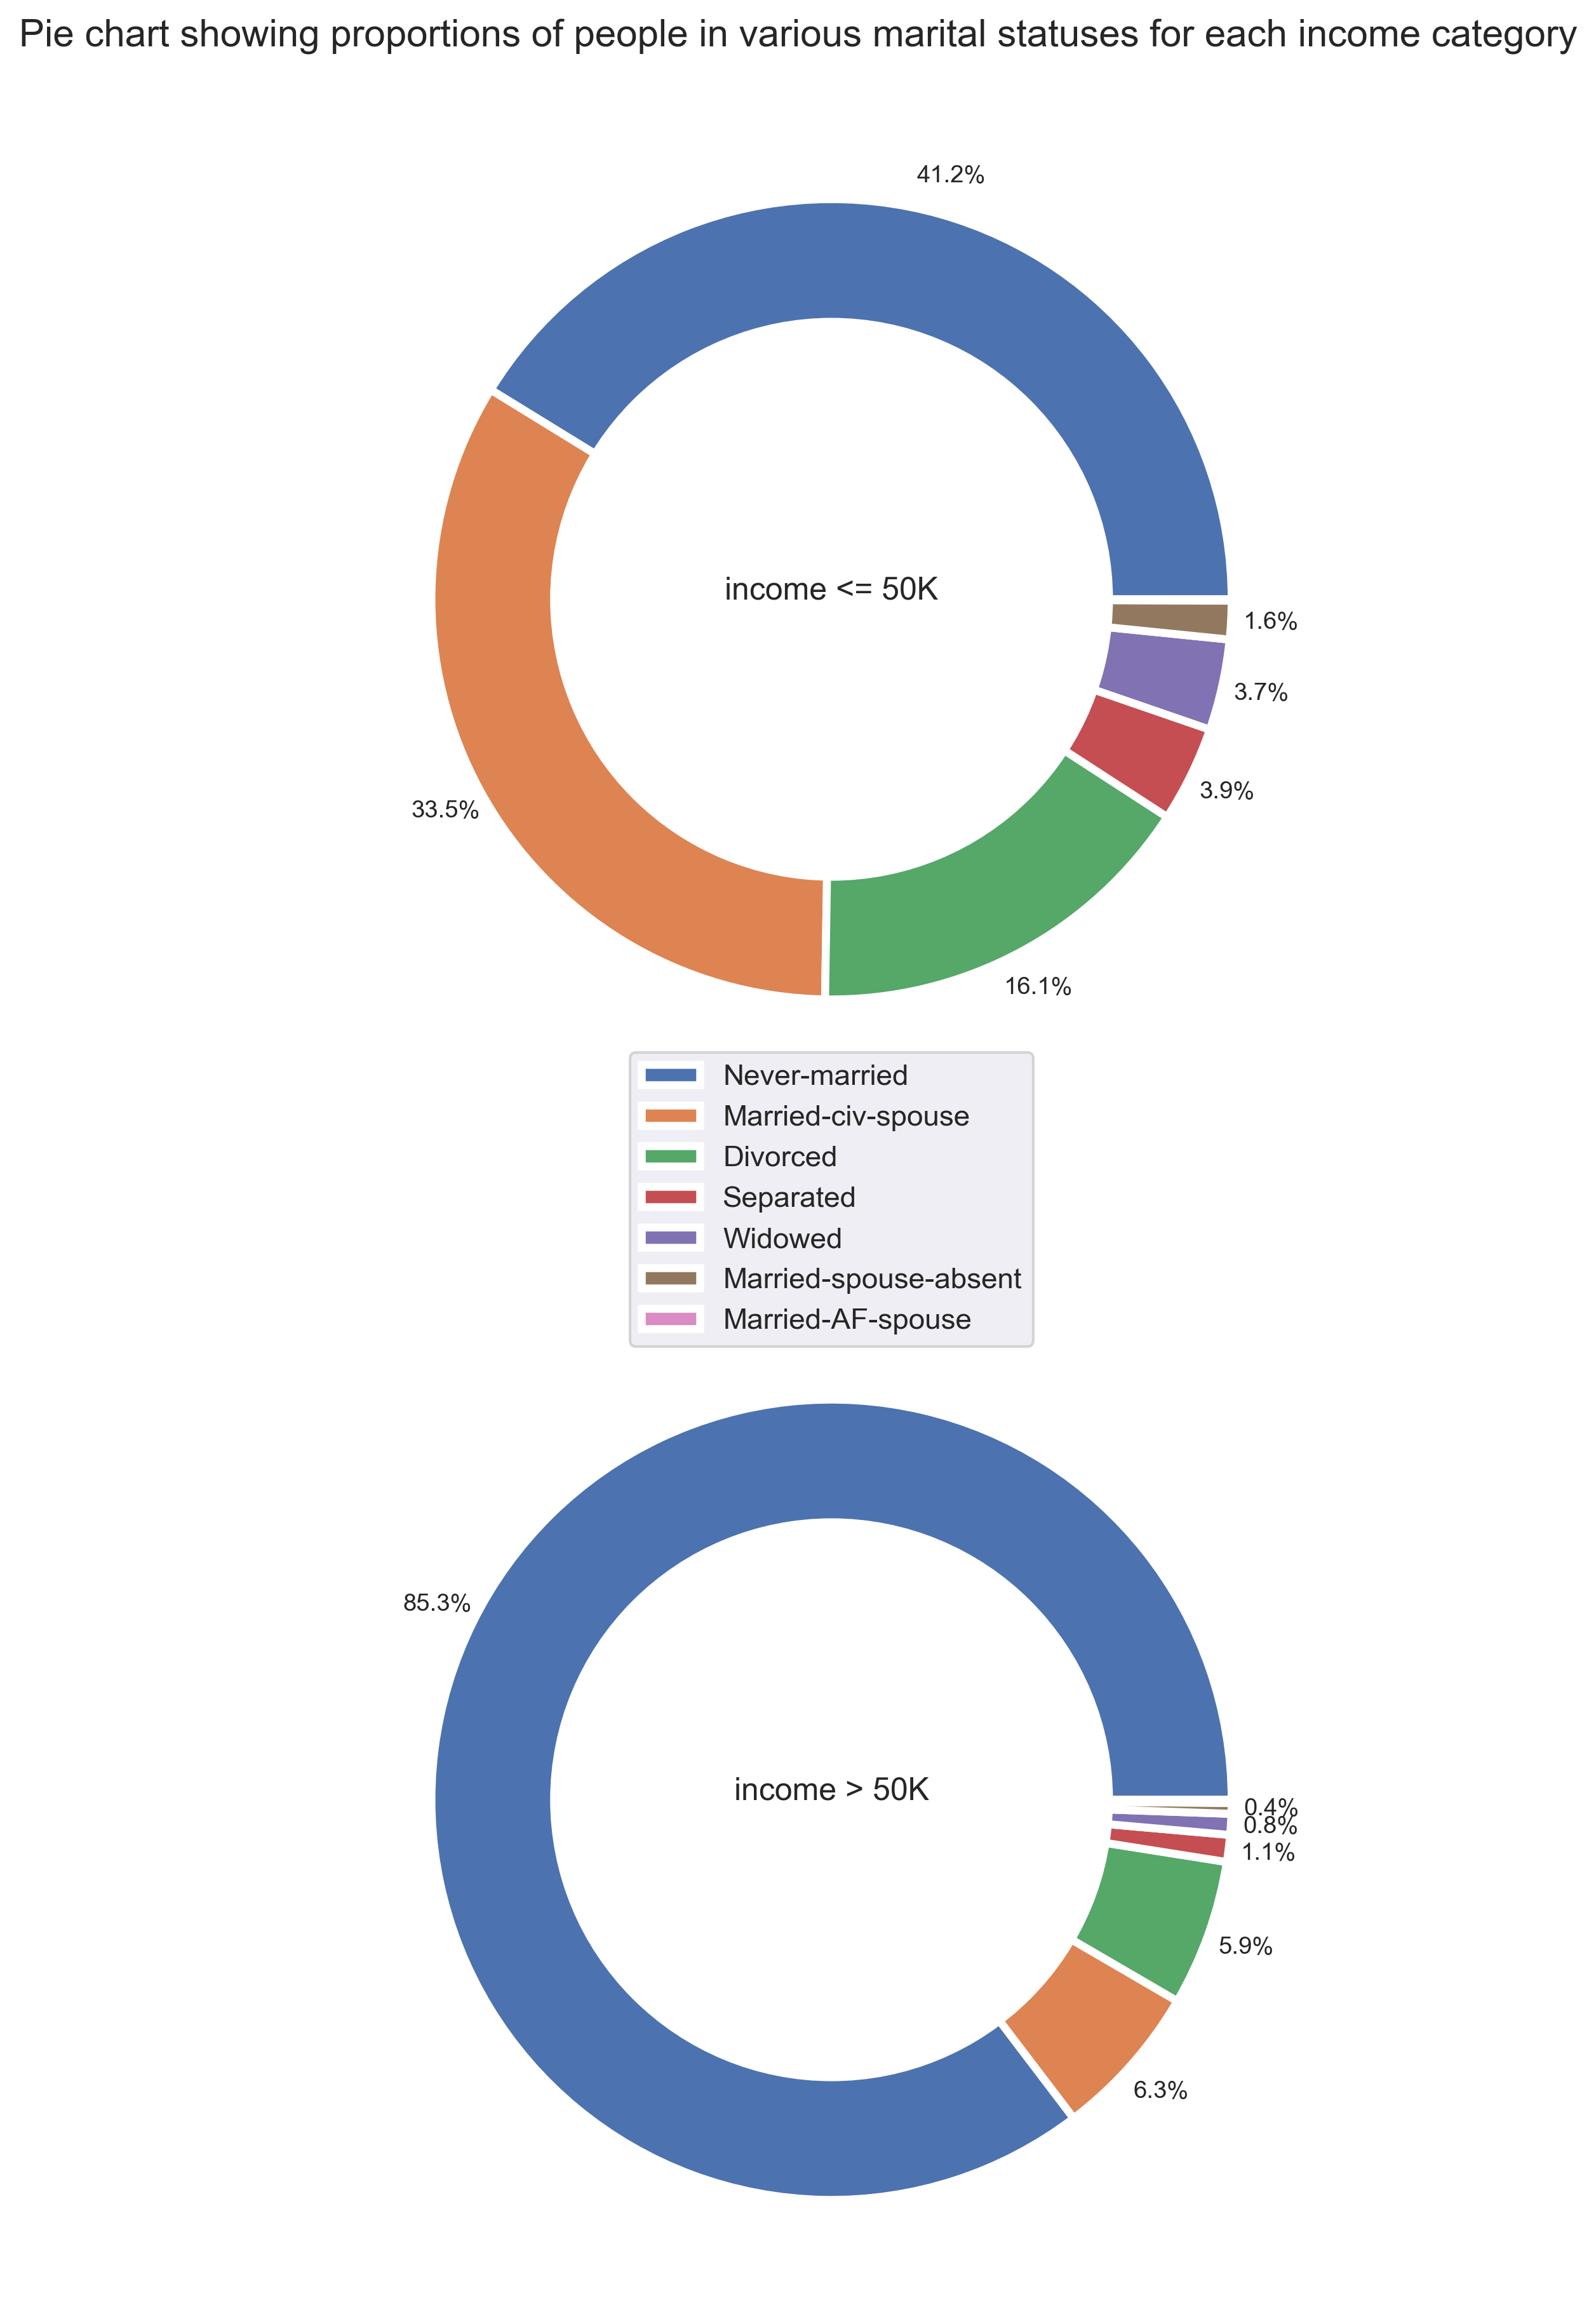

In [342]:
col = 'marital-status'

fig, ax = plt.subplots(figsize=(14, 14), nrows=2, ncols=1)

pie1 = data[data["income"] == '<=50K'][col].sort_values().value_counts().to_dict()
pie2 = data[data["income"] == '>50K'][col].sort_values().value_counts().to_dict()

props = {
    'autopct': lambda x: f'{round(x, 1)}%' if round(x,1) > 0.1 else '', 
    'wedgeprops': {'edgecolor': 'white', 'linewidth': 3}, 
    'pctdistance': 1.1,
}

wedges, labels, autopct = ax[0].pie(pie1.values(), **props)
[x.set_fontsize(9.2) for x in autopct]
wedges, labels, autopct = ax[1].pie(pie2.values(), **props)
[x.set_fontsize(9.2) for x in autopct]

ax[1].legend(pie1.keys(), loc='center', bbox_to_anchor=(.5, 1.1))

ax[0].text(0, 0, 'income <= 50K', horizontalalignment='center')
ax[1].text(0, 0, 'income > 50K', horizontalalignment='center')

ax[0].add_artist(plt.Circle((0,0),0.7,fc='white'))
ax[1].add_artist(plt.Circle((0,0),0.7,fc='white'))
# plt.subplots_adjust(wspace=0.3, hspace=0)
fig.subplots_adjust(top=0.95)
fig.suptitle('Pie chart showing proportions of people in various marital statuses for each income category\n\n')